# Simuler des sytèmes dynamiques en Python

_Ce document est librement inspiré du [tutoriel NumPy de Nicolas Rougier](http://www.labri.fr/perso/nrougier/teaching/numpy/numpy.html) et est disponible avec son autorisation sous licence Creative Commons Attribution 3.0 United States License (CC-by) http://creativecommons.org/licenses/by/3.0/us_

La simulation numérique (ou informatique) permet de représenter dans une machine (ordinateur) un phénomène écologique ou physique que l'on veut étudier à moindre coût et sans danger. 


## Systèmes dynamiques
On va s'intéresser à la simulation de **système dynamiques**. Un système dynamique est un système dont l'état dépend uniquement par un ensemble de variables et dont le comportement est décrit par un ensemble de régles prédéfinies.

Exemple de systèmes dynamiques: croissance d'une population, mouvement d'un pendule, déplacement des corps célestes, etc ...

On distingue généralement deux types de simulation: ``simulation continue`` et ``simulation discrète`` :
* Systèmes dynamiques discrets, généralement décrit par une équation de récurrence : $x(t) = F(x(t-1), t)$.
Le principe d'une ``simulation discrète`` d'un phénonème physique ou écologique consiste à représenter l'état initial de la simulation, puis ensuite de construire une fonction qui à partir d'un état précédent va déterminer l'état suivant de la simulation.
L'application de cette fonction permet de passer du temps t0 au temps t1, puis t2, etc ... Généralement, on arrrête la simulation au bout d'un certain nombre d'application de la fonction (n) déterminé à l'avance.

* Systèmes dynamiques continus, généralement décrit par une ou plusieurs équations différentielles: $\frac{dx}{dt} = F(x,t)$. Une ``simulation continue`` permet de représenter de manière continue les changements d'un système physique ou biologique. Généralement on emploie pour cela, des [équations différentielles](http://fr.wikipedia.org/wiki/%C3%89quation_diff%C3%A9rentielle).

On ne va s'intéresser ici qu'à des simulations discrètes. Dans une simulation discrète, le temps est discrétisé en durée similaire. Chaque étape peut correspondre en fonction du phénomène considérée à une durée de 1 ms, 1s, 1 jour ou bien 1000 ans. Les systèmes dynamiques sont les plus simples à comprendre, représenter et simuler par un ordinateur. Ce ceux les systèmes qui nous intéresserons le plus ici.

Commencons par simuler en Python un système dynamique constituée d'une seule variable.
On va prendre l'équation de récurrence/ 
_x(t) = a x(t-1)_

a est un paramètre qui représente le ratio entre l'état courant du système et l'état suivant. la simulation informatique va nous permettre de comprendre la dynamique d'un tel système.

Afin de construire une simulation informatique, on a besoin de définir en général au moins 3 fonctions : 

- **initialize**: fonction afin de fixer les valeurs initiales de l'ensemble des variables du système dynamique
- **observe**: fonction où l'on définit quels les états que l'on veut observer du système. On pourra par exemple afficher certaines variables ou bien faire un graphe
- **update**: fonction de mise à jour des valeurs des variables en fonction de l'état courant.

Voici un code Python pour l'initialisation:

```python
def initialize():
    global x
    x = 1.
```

La valeur initiale de x est fixé à 1. On remarquera que l'on utilise une variable globable pour _x_ ce qui est une mauvaise pratique de programmation, mais qui nous simplifie l'écriture du programme ici.

Définissons maintenant le code Python pour l'observation: on va conserver dans une liste _result_, les valeurs successives de _x_ au fur et à mesure de la simulation. Il faut également initialiser cette variable _result_ dans la fonction _initialize_:

```python
def initialize():
    global x, result
    x = 1.
    result = [x]
   
def observe():
    global x, result
    result.append(x)
```

Enfin, il faut définir la fonction update qui va mettre à jour la valeur de _x_:


```python
def update():
    global x, result
    x = a * x
```

Le programme complet est le suivant :

In [2]:
a = 1.1

def initialize():
    global x, result
    x = 1.
    result = [x]

def observe():
    global x, result
    result.append(x)

def update():
    global x, result
    x = a * x

initialize()
for t in range(30):
    update()
    observe()
print(result)

[1.0, 1.1, 1.2100000000000002, 1.3310000000000004, 1.4641000000000006, 1.6105100000000008, 1.771561000000001, 1.9487171000000014, 2.1435888100000016, 2.357947691000002, 2.5937424601000023, 2.853116706110003, 3.1384283767210035, 3.4522712143931042, 3.797498335832415, 4.177248169415656, 4.594972986357222, 5.054470284992944, 5.559917313492239, 6.115909044841463, 6.72749994932561, 7.400249944258172, 8.140274938683989, 8.954302432552389, 9.849732675807628, 10.834705943388391, 11.91817653772723, 13.109994191499954, 14.420993610649951, 15.863092971714948, 17.449402268886445]


Qu'est ce l'on observe au niveau de la variable _result_ ?

Une meilleure façon de comprendre la dynamique de ce système est de plotter les résultats. Pour cela on utilise la librairie matplotlib de Python : 


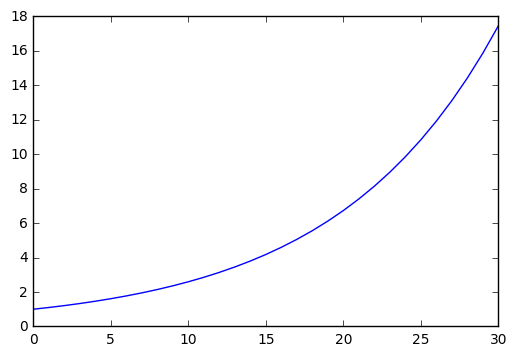

In [8]:
%matplotlib inline 
from pylab import *
a = 1.1

def initialize():
    global x, result
    x = 1.
    result = [x]

def observe():
    global x, result
    result.append(x)

def update():
    global x, result
    x=a*x

initialize()
for t in range(30):
    update()
    observe()
plot(result)
show()

On reviendra sur la librairie matplotlib qui est très utile pour visualiser le comportement d'un système dynamique de manière graphique, un peu plus tard.

Faites maintenant varier la valeur de $a$ pour voir quel type de comportement dans un système dynamique de ce type.

Faites maintenant une simulation pour le système de récurrence suivant : 
$x(t) = a x(t-1) + b, x(0) = 1$

Un tel système peut représenter par exemple la croissance d'une population de poisson qui croit avec un ration _a_ mais où l'on pêche $b$ poissons par unité de temps.
Etudier la dynamique de ce système.

Les systèmes dynamiques que nous avons construit jusqu'à présent ont une dynamique de croissance exponentielle. Est-il possible de construire un système dynamique dont la dynamique serait non seulement serait exponentielle mais également convergerait vers une population limite ?

Il nous faut donc trouver une fonction f tel que : $x(t) = f(x(t-1))*x(t-1)$ tel que $f(x)$ doit être proche de $a$ lorsque la population est faible et $f(x)$ doit s'approcher de 1 lorsque un obtient un maximum que l'on va note $K$.

La forme mathématique la plus simple pour $f$ qui respecte ces contraintes est : 
$f(x) = -(a-1)*x/K + a$

Faire une simulation d'un tel système pour vérifier que l'on obtient bien une dynamique qui converge vers _K_.

Un tel système dynamique est appellé modèle de **croissance logistique** : https://fr.wikipedia.org/wiki/Fonction_logistique_(Verhulst)

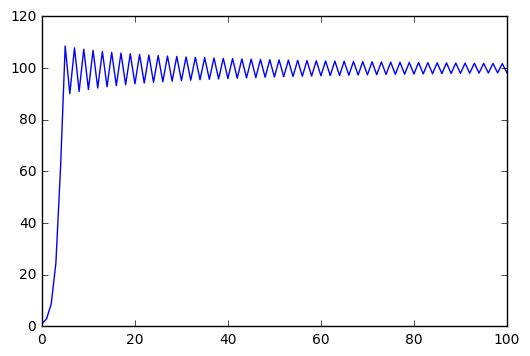

In [12]:
%matplotlib inline 
from pylab import *
a = 2.99
K = 100
def initialize():
    global x, result
    x = 1.0
    result = [x]

def observe():
    global x, result
    result.append(x)
    
def update():
    global x, result
    x = (-(a-1)*x/K + a)*x
    
initialize()
for t in range(100):
    update()
    observe()
plot(result)
show()

## Le Jeu de la Vie
Prenons maintenant un exemple plus complexes de simulation, celui d'un phénonème écologique representant l'évolution de cellules qui naissent ou qui meurent au cours du temps: le jeu de la Vie.
Le [Jeu de la Vie](https://fr.wikipedia.org/wiki/Jeu_de_la_vie) est un des premiers exemples
d automates cellulaires (voir figure ci-dessous) construit par John Conway en 1970. Ces automates cellulaires peuvent être considérés comme un tableau de cellules qui sont connectées les unes aux autres par la notion
de voisinage.

Ce "jeu" est un fait un jeu à zéro joueur, car son évolution est déterminé uniquement par son état inital et ne nécessite pas d'entrées de joueurs humains. La seule façon d'interagir avec un Jeu de la Vie est de créer une configuration initiale et d'observer comment elle évolue au cours du temps.

L'univers (ou l'état) du Jeu de la Live est une grille à deux dimensions de taille infinie, composé de cellules carrées. Chaque cellule peut contenir l'un des deux états possibles: vivant ou mort, que l'on représente par les valeurs entières 0 ou 1.

![image](http://www.labri.fr/perso/nrougier/teaching/numpy/figures/game-of-life.png)

Chaque cellule interagit avec ces 8 voisins, qui sont les cellules directement adjacentes horizontalement, verticalement et en diagonale. A chaque étape du temps, les règles suivantes vont s'appliquer :

1. Une cellule vivante avec moins de deux voisines vivantes, meurt d'isolement,
2. Une cellule vivante avec plus de 3 cellules voisines vivantes, meurt d'étouffement,
3. Une cellule vivante avec 2 ou 3 cellules voisines vivantes, reste inchangée à la prochaine génération,
4. Une cellule morte avec exactement 3 cellules vivantes, devient une cellule vivante.

L'état de départ est constitué par une forme initiale. La première génération est créér en appliquant les règles ci-dessus simultanément à toutes les cellules de l'état de départ: naissances et morts sont effectués simultanément, and le moment où cela se déroule est appellé tick (de simulation). Les règles continuent d'être appliquées pour créer les futures générations.

Pour commencer, nous allons utiliser un état de départ très simple, appellé "planeur" (glider) qui est connu pour se déplacer diagonalement au bout de 4 itérations comme indiqué ci-dessous :

![image](http://www.labri.fr/perso/nrougier/teaching/numpy/figures/glider-00.png)
![image](http://www.labri.fr/perso/nrougier/teaching/numpy/figures/glider-01.png)
![image](http://www.labri.fr/perso/nrougier/teaching/numpy/figures/glider-02.png)
![image](http://www.labri.fr/perso/nrougier/teaching/numpy/figures/glider-03.png)
![image](http://www.labri.fr/perso/nrougier/teaching/numpy/figures/glider-04.png)
![image](http://www.labri.fr/perso/nrougier/teaching/numpy/figures/glider-05.png)

Cette propriété va nous permettre de débogguer visuellement plus facilement nos programmes.

La première question à se poser pour faire cette simulation est comment représenter un état, ici l'ensemble des cellules à un instant donné. En Python, il est possible d'utiliser le type list ou array pour représenter des tableaux a une ou plusieurs dimensions.

La bibliothèque scientifique ``NumPy`` est une alternative qui permet de manipuler très efficacemment des tableaux de grande taille en Python: http://www.numpy.org/

La première chose à faire est de créer un tableau NumPy afin de contenir les cellules (``cells``). Ceci peut être fait facilement de la façon suivante :



In [41]:
import numpy as np
cells = np.array([[0,0,0,0,0,0],
              [0,0,0,1,0,0],
              [0,1,0,1,0,0],
              [0,0,1,1,0,0],
              [0,0,0,0,0,0],
              [0,0,0,0,0,0]])

Affichons le contenu de la variable _cells_ :

In [22]:
print(cells)

[[0 0 0 0 0 0]
 [0 0 0 1 0 0]
 [0 1 0 1 0 0]
 [0 0 1 1 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]



Il existe de nombreuses autres façons de créer un tableau NumPy : http://docs.scipy.org/doc/numpy/reference/routines.array-creation.html

Notez que nous n'avons pas spécifié le type des données contenues dans le tableau, NumPy a choisi pour nous. Comme tous les éléments sont des entiers, NumPy a choisi le type entier (integer). Ceci peut se vérifier facilement :


In [23]:
print(cells.dtype)

int64



On peut facilement vérifier la taille d'un tableau, ici par exemple 6x6 :


In [ ]:
print(cells.shape)



Chaque élément de ``cells`` peut être accédé en utilisant un index de ligne et de colonne (en suivant cet ordre) :


In [ ]:
print(cells[0,5])


Il est également possible d'accéder à une sous-partie d'un tableau, en utilsant la notation dite slice :


In [ ]:
print(cells[1:5,1:5])
[[0 0 1 0]
 [1 0 1 0]
 [0 1 1 0]
 [0 0 0 0]]


Dans l'exemple ci-dessous, nous avons extrait une sous-partie de ``cells`` de la ligne 1 à 5 et de la collonne 1 à 5. Il est important de bien comprendre qu'il s'agit vraiment d'une sous-ensemble de ``cells`` dans le sens où chaque modification de la sous-partie va avoir un impact direct sur ``cells`` :


In [26]:
a = cells[1:5,1:5]
a[0,0] = 9
print(a)

[[9 0 1 0]
 [1 0 1 0]
 [0 1 1 0]
 [0 0 0 0]]


In [25]:
print(cells)

[[0 0 0 0 0 0]
 [0 0 0 1 0 0]
 [0 1 0 1 0 0]
 [0 0 1 1 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]



Nous avons modifié la valeur de ``a[0,0]`` à 9 et nous voyons un changement immédiat dans ``cells[1,1]`` parce que ``a[0,0]`` correspond à ``cells[1,1]``. Ceci peut paraître trivial avec des tableaux si simples, mais les choses peuvent devenir plus complexe comme nous le verrons plus tard. En cas de doute, il possible de vérifier rapidement, si un tableau est une partie d'un autre :


In [30]:
print(cells.base)

None


In [29]:
print(a.base is cells)

True


N'oublions pas de remettre la valeur de a[0,0] à 0 :

In [31]:
a[0,0] = 0

### Compter les voisins
Nous avons besoin d'une fonction pour compter les voisins d'une cellule.


In [38]:
def compute_neighbours(cells):
    rows, cols = len(cells), len(cells[0])
    count  = np.zeros([rows, cols], int)
    for x in range(1,cols-1):
        for y in range(1,rows-1):
            count[y][x] = cells[y-1][x-1]+cells[y][x-1]+cells[y+1][x-1] \
                      + cells[y-1][x]              +cells[y+1][x]   \
                      + cells[y-1][x+1]+cells[y][x+1]+cells[y+1][x+1]
    return count

Appliquons cette fonction sur notre tableau _cells_:

In [37]:
compute_neighbours(cells)

array([[0, 0, 0, 0, 0, 0],
       [0, 1, 3, 1, 2, 0],
       [0, 1, 5, 3, 3, 0],
       [0, 2, 3, 2, 2, 0],
       [0, 1, 2, 2, 1, 0],
       [0, 0, 0, 0, 0, 0]])

Avec NumPy, il est possible d'utiliser des opérations qui portent sur l'ensemble du tableau, plutôt que faire des itérations, ce que l'on appelle la **vectorisation**. Voir version ici : http://www.labri.fr/perso/nrougier/teaching/numpy/numpy.html#the-game-of-life

### Faire des itérations

Construisons la fonction ``iterate`` qui permet d'application les règles sur ``cells`` pour produire une nouvelle génération.


In [42]:
def iterate(cells):
    rows,cols = len(cells), len(cells[0])
    N = compute_neighbours(cells)
    for x in range(1,cols-1):
        for y in range(1,rows-1):
            if cells[y][x] == 1 and (N[y][x] < 2 or N[y][x] > 3):
                cells[y][x] = 0
            elif cells[y][x] == 0 and N[y][x] == 3:
                cells[y][x] = 1
    return cells

Appliquons la fonction iterate sur le tableau ``cells`` définit précédemment.


In [44]:
iterate(cells)

array([[0, 0, 1, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 1, 1],
       [1, 0, 0, ..., 1, 1, 0],
       ..., 
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 1]])

**Question: Expliquer comment la fonction ``iterate`` fonctionne ?**

### Lancer une simulation
Essayons de lancer le Jeu de la Vie sur une grille beaucoup plus grande.
Pour cela générons une grille remplie de 0 et 1 placé de manière aléatoire.

La bibliothèque ``random`` permet de générer des nombres aléatoires.
Voir documentation ici: https://docs.python.org/3/library/random.html

Quelques unes des fonctions les plus utiles sont :

* ``random.seed()`` : permet d'initialiser le générateur de nombres aléatoires
* ``random.random()`` : retourne un nombre réél aléatoire dans l'intervalle [0, 1]
* ``random.randrange(a,b)``: retourne un nombre entier compris entre a et b (inclus).

**Question: Pourquoi les nombres générés par cette bibliothèque sont des nombres pseudo-aléatoires ?**

La bibliothèque NumPy complète la bibliothèque ``random`` par des fonctions comme la fonction ``np.random.randint`` qui permet de générer des nombres aléatoires pour remplir un tableau (voir documentation ici : http://docs.scipy.org/doc/numpy/reference/routines.random.html) :


In [47]:
cells = np.random.randint(0, 2, (256,512))
print(cells)

[[1 1 1 ..., 0 0 0]
 [1 1 1 ..., 0 1 0]
 [0 0 1 ..., 0 1 1]
 ..., 
 [0 0 0 ..., 1 0 0]
 [0 1 1 ..., 0 0 0]
 [1 1 0 ..., 0 0 1]]


**Question: donner une explication des paramètres de la fonction ``np.random.randint`` ?**

Effectuons 10 itérations :

In [46]:
for i in range(10):
    iterate(cells)


et affichons les résultats :


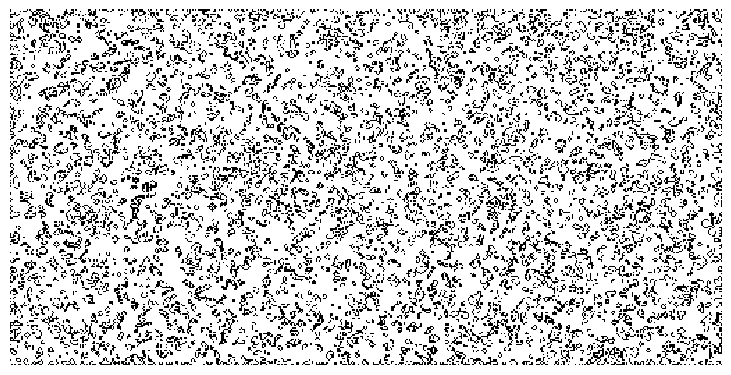

In [43]:
import matplotlib.pyplot as plt

size = np.array(cells.shape)
dpi = 72.0
figsize= size[1]/float(dpi),size[0]/float(dpi)
fig = plt.figure(figsize = figsize, dpi = dpi, facecolor = "white")
fig.add_axes([0.0, 0.0, 1.0, 1.0], frameon = False)
plt.imshow(cells, interpolation = 'nearest', cmap = plt.cm.gray_r)
plt.xticks([]), plt.yticks([])
plt.show()


Nous utilisons pour l'affichage la bibliothèque Matplotlib que nous aborderons plus en détail dans la prochaine fiche.

Le Jeu de Vie a généré beaucoup de travaux scientifiques pour identifier des formes stables notamment. Vous trouverez sur ce site un catalogue des formes qui peuvent apparaître dans un Jeu de la Vie (glider, spaceships, etc ..):
http://www.conwaylife.com/wiki/Main_Page

Il est même possible d'exécuter une simulation du Jeu de la Vie dans un Jeu de la Vie:
https://www.youtube.com/watch?v=xP5-iIeKXE8

Cela ne rappelle pas un [film](https://fr.wikipedia.org/wiki/Inception) ?

